<a href="https://colab.research.google.com/github/sajacaros/bootcamp_colab/blob/main/ai6_linear_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/ai6th/data/titanic/'

train_path = path + 'train.csv'
test_path = path + 'test.csv'
submission_path = path + 'gender_submission.csv'

In [3]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
submission = pd.read_csv(submission_path)

In [4]:
# 필수 체크 항목
# 1. 결측치 체크
# 2. dtype이 Object인 column 찾기
# 3. target value distribution 체크

In [5]:
# 1. 결측치 체크
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
train_df[train_df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
# 2. dtype이 Object인 column 찾기
train_df.columns[train_df.dtypes == 'object']

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [9]:
# 3. target value distribution 체크
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

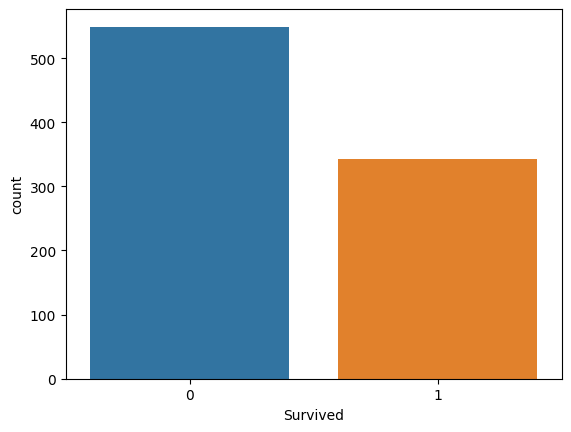

In [10]:
sns.countplot(data=train_df, x='Survived')

<Axes: ylabel='Fare'>

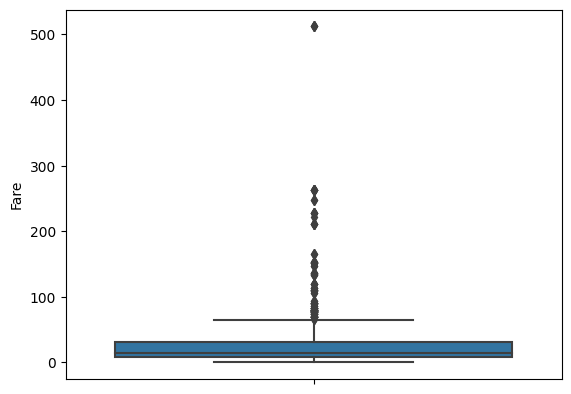

In [11]:
sns.boxplot(data=train_df, y='Fare')

In [12]:
# feature engineering
# 머신러닝 모델에 학습하기 전에 앞서서 확인한 데이터에 처리는 반대시 해야함
# 결측치는 없어야 하고 object 타입도 없어야 한다.

In [13]:
# 1. Cabin의 유무가 Survived에 영향이 있는가?
# Cabin이 없는 사람들 중 생존 비율
train_df[train_df.Cabin.isnull()].Survived.mean()

0.29985443959243085

In [14]:
# Cabin이 있는 사람들 중 생존 비율
train_df[train_df.Cabin.notnull()].Survived.mean()

0.6666666666666666

In [15]:
train = train_df.copy()

In [16]:
# train['IsCabin'] = train.Cabin.notnull()*1
train.loc[train.Cabin.notnull(), 'IsCabin'] = 1
train.loc[train.Cabin.isnull(), 'IsCabin'] = 0
train.IsCabin.mean()

0.22895622895622897

In [17]:
# Family Size feature 만들기
train['FamilySize'] = train['SibSp'] + train['Parch']

In [18]:
# 불필요한 column 제거
train = train.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Cabin', 'Ticket'])

In [19]:
train.isnull().mean()

Survived      0.000000
Pclass        0.000000
Sex           0.000000
Age           0.198653
Fare          0.000000
Embarked      0.002245
IsCabin       0.000000
FamilySize    0.000000
dtype: float64

In [20]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
# 결측치 채우기
train.Age = train.Age.fillna(train.Age.median())
train.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    889 non-null    object 
 6   IsCabin     891 non-null    float64
 7   FamilySize  891 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 55.8+ KB


In [23]:
# 결측행 지우기
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    object 
 3   Age         889 non-null    float64
 4   Fare        889 non-null    float64
 5   Embarked    889 non-null    object 
 6   IsCabin     889 non-null    float64
 7   FamilySize  889 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 62.5+ KB


In [24]:
# Encoding categorical feature

# 1) Ordinal encoding
# pd.factorize()

# 2) One-hot encoding
# pd.get_dummies()

In [25]:
# Ordinal encoding
# sort를 안해주면 값이 바뀔수 있음
train.Sex = pd.factorize(train.Sex, sort=True)[0] # factorize의 결과는 tuple
# train.Sex.map({'female':0, 'male':1})

<ipython-input-25-03263eb78f8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Sex = pd.factorize(train.Sex, sort=True)[0] # factorize의 결과는 tuple


In [26]:
# One-hot encoding
train = pd.get_dummies(data=train, columns=['Embarked'])
train.head()

,Survived,Pclass,Sex,Age,Fare,IsCabin,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,0.0,1,0,0,1
1,1,1,0,38.0,71.2833,1.0,1,1,0,0
2,1,3,0,26.0,7.9250,0.0,0,0,0,1
3,1,1,0,35.0,53.1000,1.0,1,0,0,1
4,0,3,1,35.0,8.0500,0.0,0,0,0,1


In [27]:
# 이상치 제거
alternative_fare = train.nlargest(10, 'Fare', keep='first').iloc[5,3]
train.loc[train.Fare>alternative_fare, 'Fare'] = alternative_fare

In [28]:
# data setting for training
from sklearn.model_selection import train_test_split

X = train.drop(columns=['Survived']) # feature vector
y = train.Survived  # target value

train_idx, valid_idx = train_test_split(range(len(train)), test_size=0.2, shuffle=True, random_state=42)
print(len(train_idx), len(valid_idx))

711 178


In [29]:
print(y.iloc[train_idx].mean(), y.iloc[valid_idx].mean())

0.38115330520393814 0.38764044943820225


In [30]:
# scale
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler().fit(X.iloc[train_idx]) # train data로만 훈련
# X_train_scale = scaler.transform(X.iloc[train_idx])
# X_valid_scale = scaler.transform(X.iloc[valid_idx])
# X_train_scale = pd.DataFrame(X_train_scale, columns=X.columns)
# X_valid_scale = pd.DataFrame(X_valid_scale, columns=X.columns)

In [31]:
# sklearn에서 학습을 하는 방법
# 1. 사용할 함수를 불러온다
# 2. 해당 함수를 선언한다
# 3. fit()

In [32]:
from sklearn.linear_model import LinearRegression, LogisticRegression

reg = LinearRegression()
reg.fit(X.iloc[train_idx], y.iloc[train_idx])

lreg = LogisticRegression()
lreg.fit(X.iloc[train_idx], y.iloc[train_idx])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
# 회귀 성능 비교
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import accuracy_score

reg_pred = reg.predict(X.iloc[train_idx])
lreg_pred = lreg.predict_proba(X.iloc[train_idx])[:, 1]

print(f"Linear mse : {mean_squared_error(y.iloc[train_idx], reg_pred):.4f}")
print(f"Logistic mse : {mean_squared_error(y.iloc[train_idx], lreg_pred):.4f}")


print(f"Linear accuracy : {accuracy_score(y.iloc[train_idx], [1 if r>0.5 else 0 for r in reg_pred]):.4f}")
print(f"Logistic accuracy : {accuracy_score(y.iloc[train_idx], [1 if r>0.5 else 0 for r in lreg_pred]):.4f}")

Linear mse : 0.1402
Logistic mse : 0.1379
Linear accuracy : 0.7947
Logistic accuracy : 0.8045


In [34]:

valid_reg_pred = reg.predict(X.iloc[valid_idx])
valid_lreg_pred = lreg.predict_proba(X.iloc[valid_idx])[:, 1]
print(f"Linear mse : {mean_squared_error(y.iloc[valid_idx], valid_reg_pred):.4f}")
print(f"Logistic mse : {mean_squared_error(y.iloc[valid_idx], valid_lreg_pred):.4f}")

print(f"Linear accuracy : {accuracy_score(y.iloc[valid_idx], [1 if r>0.5 else 0 for r in valid_reg_pred]):.4f}")
print(f"Logistic accuracy : {accuracy_score(y.iloc[valid_idx], [1 if r>0.5 else 0 for r in valid_lreg_pred]):.4f}")

Linear mse : 0.1453
Logistic mse : 0.1443
Linear accuracy : 0.8146
Logistic accuracy : 0.8034


In [35]:
test = test_df.copy()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [36]:
# Cabin 결측값 처리
# 유무에 대한 정보 삽입
test.loc[test.Cabin.isnull(), 'IsCabin'] = 0
test.loc[test.Cabin.notnull(), 'IsCabin'] = 1

In [37]:
# Age 결측값 처리
test.Age = test.Age.fillna(test.Age.median())

In [38]:
# SibSp + Parch
test['FamilySize'] = test['SibSp'] + test['Parch']
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  IsCabin      418 non-null    float64
 12  FamilySize   418 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB


In [39]:
# 성별 처리 female = 0, male = 1
test.Sex = test.Sex.map({'female':0, 'male':1})
# test.Sex = pd.factorize(test.Sex, sort=True)[0]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  IsCabin      418 non-null    float64
 12  FamilySize   418 non-null    int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 42.6+ KB


In [40]:
test = test.drop(columns=['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'PassengerId'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        417 non-null    float64
 4   Embarked    418 non-null    object 
 5   IsCabin     418 non-null    float64
 6   FamilySize  418 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 23.0+ KB


In [41]:
test = pd.get_dummies(data=test, columns=['Embarked'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        417 non-null    float64
 4   IsCabin     418 non-null    float64
 5   FamilySize  418 non-null    int64  
 6   Embarked_C  418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(3), int64(3), uint8(3)
memory usage: 20.9 KB


<Axes: ylabel='Fare'>

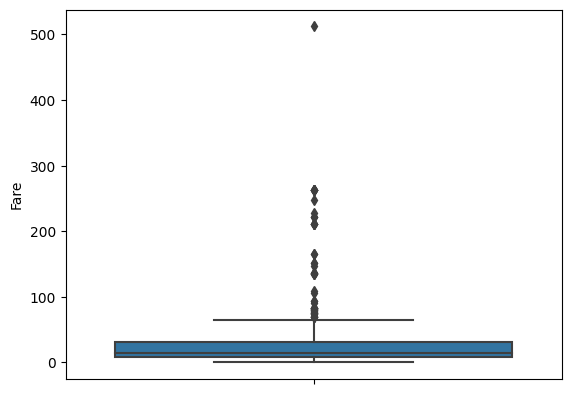

In [42]:
sns.boxplot(data=test, y='Fare')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   IsCabin     418 non-null    float64
 5   FamilySize  418 non-null    int64  
 6   Embarked_C  418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(3), int64(3), uint8(3)
memory usage: 20.9 KB


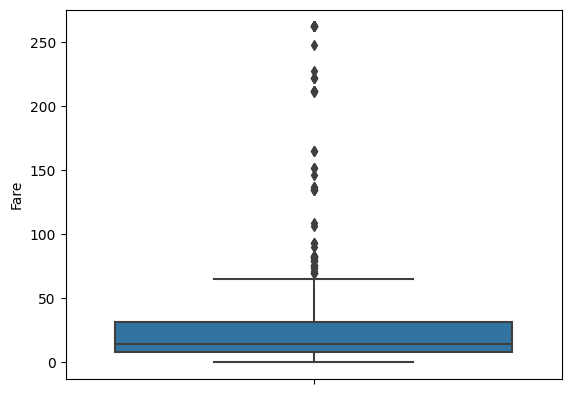

In [43]:
# 이상치, 결측치 정정
alternative_fare = test.nlargest(10, 'Fare', keep='first').iloc[5,3] # 1 = 6th value, 3's column = Fare
test.loc[test.Fare>alternative_fare, 'Fare'] = alternative_fare
test.Fare = test.Fare.fillna(test.Fare.median())
sns.boxplot(data=test, y='Fare')
test.info()

In [44]:
# test_scale = scaler.transform(test)
# test_scale = pd.DataFrame(test_scale, columns=test.columns)

In [45]:
reg.predict(test)

array([ 1.09254870e-01,  4.17134368e-01,  4.15186732e-02,  1.07288049e-01,
        5.72370702e-01,  1.96900031e-01,  6.42042136e-01,  2.72682042e-01,
        7.31708142e-01,  1.69132940e-01,  1.01138303e-01,  3.16731613e-01,
        1.49459239e+00,  5.72399094e-02,  1.16830668e+00,  9.03344153e-01,
        2.39621179e-01,  2.07102222e-01,  5.55477134e-01,  5.54928018e-01,
        5.46957841e-01,  1.30240634e-01,  9.91628557e-01,  7.85402706e-01,
        2.69517767e+00, -4.72799205e-02,  1.41047878e+00,  1.97282976e-01,
        5.07433064e-01,  1.82104981e-01,  1.42340045e-01,  3.05827018e-01,
        5.16008298e-01,  5.78345828e-01,  8.19253065e-01,  2.23501321e-01,
        6.07308889e-01,  6.51498774e-01,  1.27098015e-01,  4.90961771e-01,
        8.81061327e-02,  5.67396181e-01,  9.12463890e-03,  7.24752426e-01,
        1.11225106e+00,  1.14464847e-01,  5.46899019e-01,  1.57715834e-01,
        1.32735507e+00,  5.09700477e-01,  8.04509974e-01,  3.27833858e-01,
        7.17937289e-01,  

In [46]:
lreg.predict_proba(test)[:, 1]

array([0.09245775, 0.29050826, 0.05659267, 0.10238258, 0.54020462,
       0.17409126, 0.63608811, 0.25514351, 0.777235  , 0.15093794,
       0.09817998, 0.31073808, 0.99861972, 0.07434452, 0.98568278,
       0.91900024, 0.1904109 , 0.17678561, 0.51387383, 0.51121548,
       0.71119517, 0.11064453, 0.95478589, 0.92677895, 0.99999985,
       0.03824083, 0.9971239 , 0.16725671, 0.59009399, 0.15542991,
       0.12544505, 0.30359407, 0.4480707 , 0.55820618, 0.92961332,
       0.19364526, 0.609586  , 0.67927785, 0.11599476, 0.67598045,
       0.08726193, 0.67894002, 0.05494287, 0.76794948, 0.9780606 ,
       0.10653666, 0.64330227, 0.12409426, 0.99552748, 0.43932764,
       0.92640388, 0.32142226, 0.75083767, 0.99999986, 0.32869926,
       0.14071009, 0.07079758, 0.18561183, 0.10894268, 0.99999998,
       0.14535573, 0.18006773, 0.13883842, 0.71527337, 0.99999955,
       0.86016828, 0.75193315, 0.5387209 , 0.7583487 , 0.99999941,
       0.69708013, 0.12455927, 0.58631562, 0.76951099, 0.99999

In [47]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [48]:
coef = pd.DataFrame(reg.coef_, index=X.columns, columns=['reg'])
coef['lreg'] = lreg.coef_[0]
pd.options.display.float_format = '{:.2f}'.format
coef

,reg,lreg
Pclass,-0.10,-0.58
Sex,-0.50,-2.65
Age,-0.01,-0.04
Fare,0.01,0.06
IsCabin,0.12,0.66
FamilySize,-0.05,-0.38
Embarked_C,0.03,0.18
Embarked_Q,0.01,-0.00
Embarked_S,-0.04,-0.27
